In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import quandl

import seaborn as sns
import matplotlib.pyplot as plt
import prettyplotlib as ppl
import datetime


quandl.ApiConfig.api_key = "kazSejhsVBDMejB5BzpE"

pd.set_option("max_columns", None)
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark -v -d -a 'Mario Javier Carrillo' -p matplotlib,numpy,pandas

/Users/Javier/anaconda2/envs/udemy/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Mario Javier Carrillo 2017-12-11 

CPython 3.6.3
IPython 6.2.1

matplotlib 2.1.0
numpy 1.13.3
pandas 0.21.0


Note:
1. Uncomment the lines below for the first time to install the trading package.
2. Run it once then comment the lines again.


In [2]:
# ! pip uninstall trading -y

In [3]:
# ! pip install --upgrade -I --force-reinstall ..

In [4]:
import trading 
import trading.trade_strategy as strategy
import trading.graphs as visuals

In [5]:
df = strategy.get_data(stock="EOD/AAPL", end_date='2017-12-08')

Number of entries collected 9329
3 top rows              Open   High    Low  Close     Volume  Dividend  Split  Adj_Open  \
Date                                                                           
1980-12-12  28.75  28.87  28.75  28.75  2093900.0       0.0    1.0  0.421187   
1980-12-15  27.38  27.38  27.25  27.25   785200.0       0.0    1.0  0.401117   
1980-12-16  25.37  25.37  25.25  25.25   472000.0       0.0    1.0  0.371670   

            Adj_High   Adj_Low  Adj_Close   Adj_Volume  diff  year stock_name  
Date                                                                           
1980-12-12  0.422945  0.421187   0.421187  117258400.0  0.00  1980   eod/aapl  
1980-12-15  0.401117  0.399212   0.399212   43971200.0  0.13  1980   eod/aapl  
1980-12-16  0.371670  0.369912   0.369912   26432000.0  0.12  1980   eod/aapl  

3 tail rows               Open      High     Low   Close      Volume  Dividend  Split  \
Date                                                             

## Visualizations
---

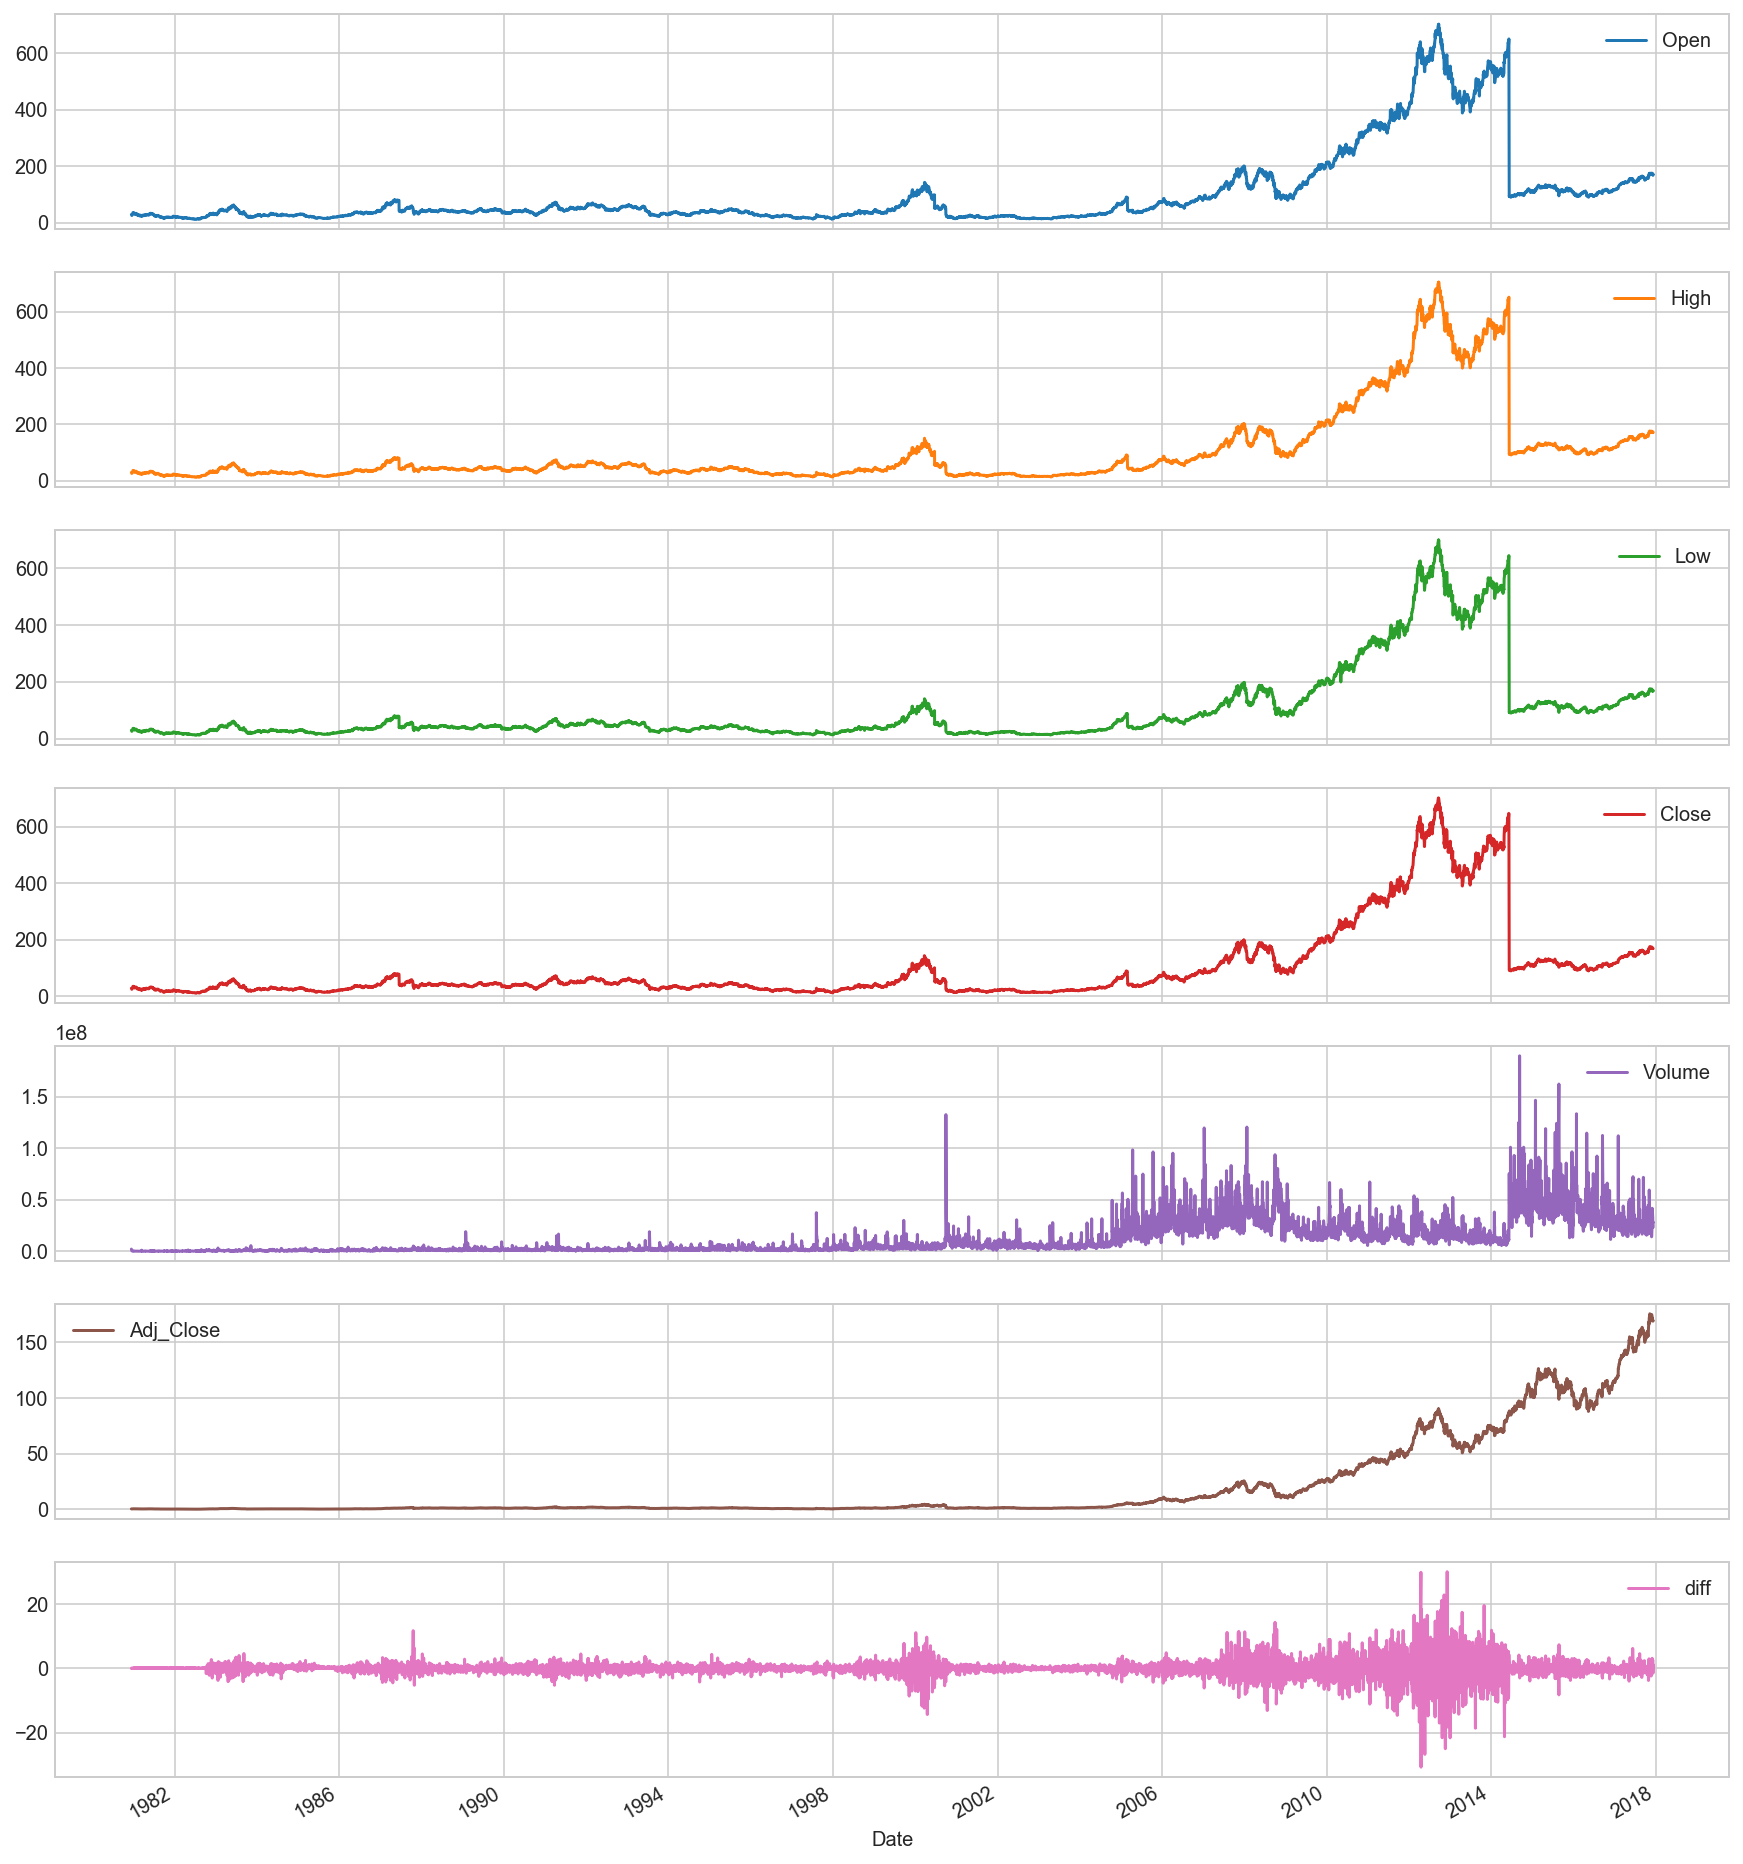

In [6]:
exclude_cols = ['Dividend','Split', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Volume', 
                'year', 'month','stock_name']
#'Adj_Close' ## historical returns
visuals.trend_graph(df,  exclude_list=exclude_cols)

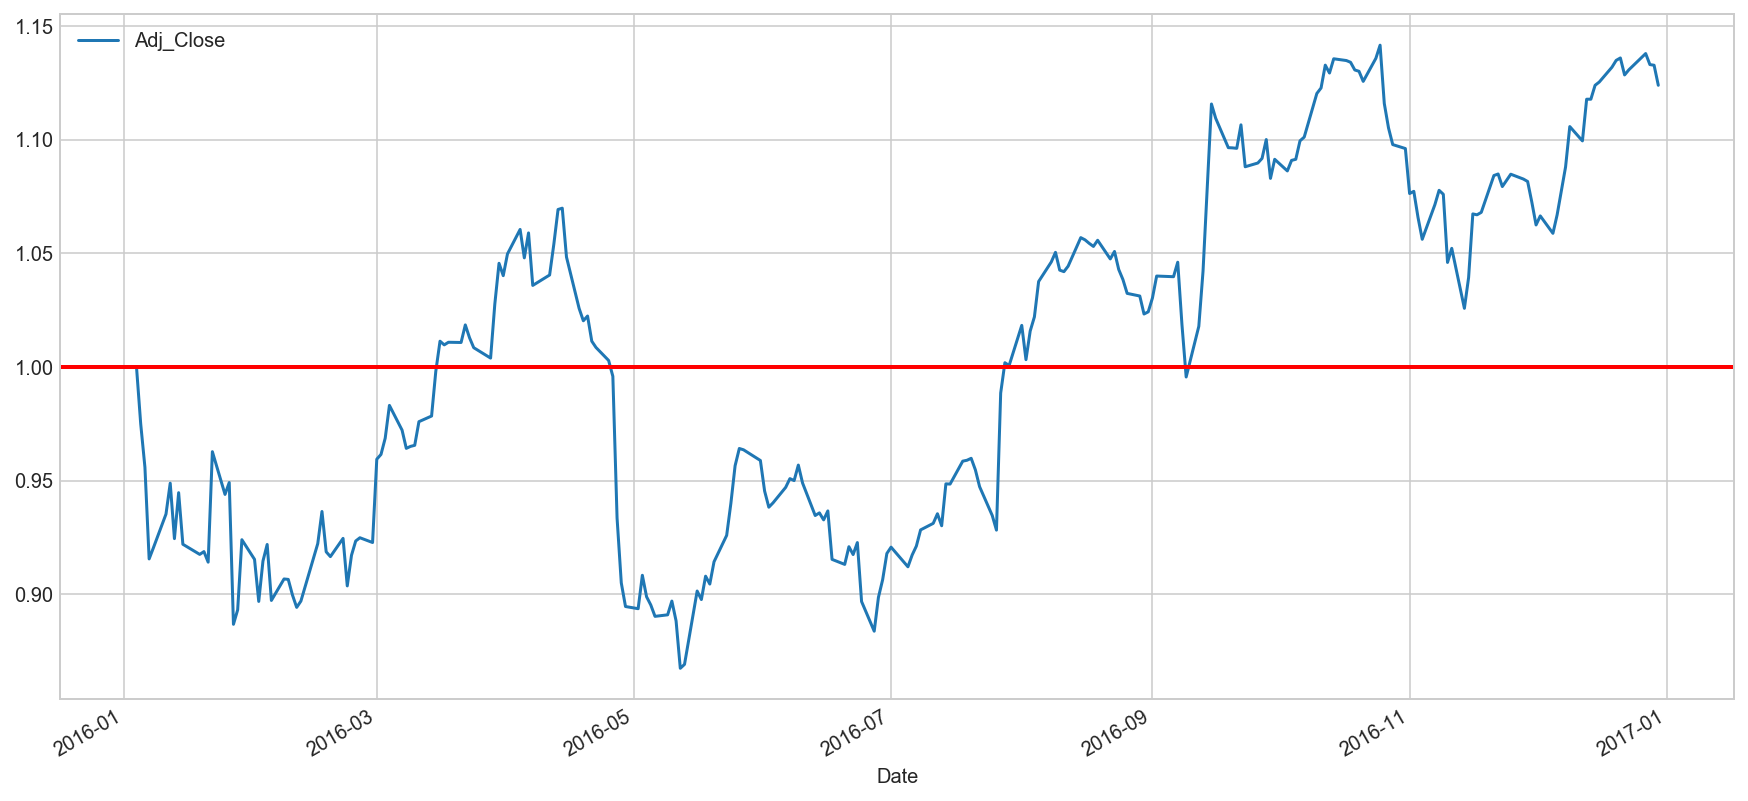

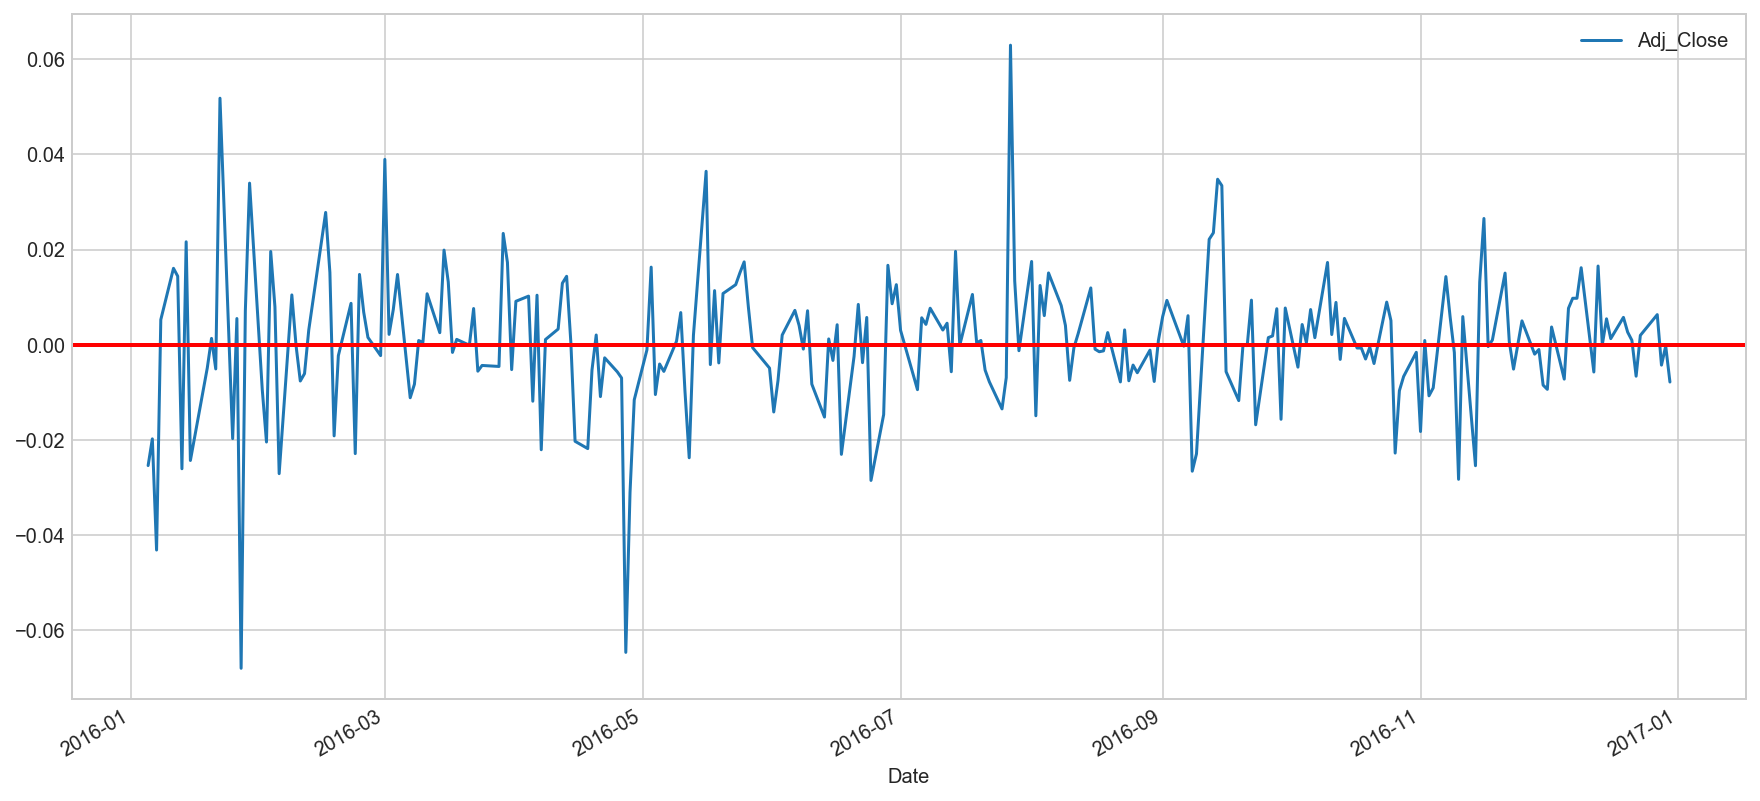

In [7]:
visuals.returns_log_normal(df, col_name='Adj_Close', period=2016)

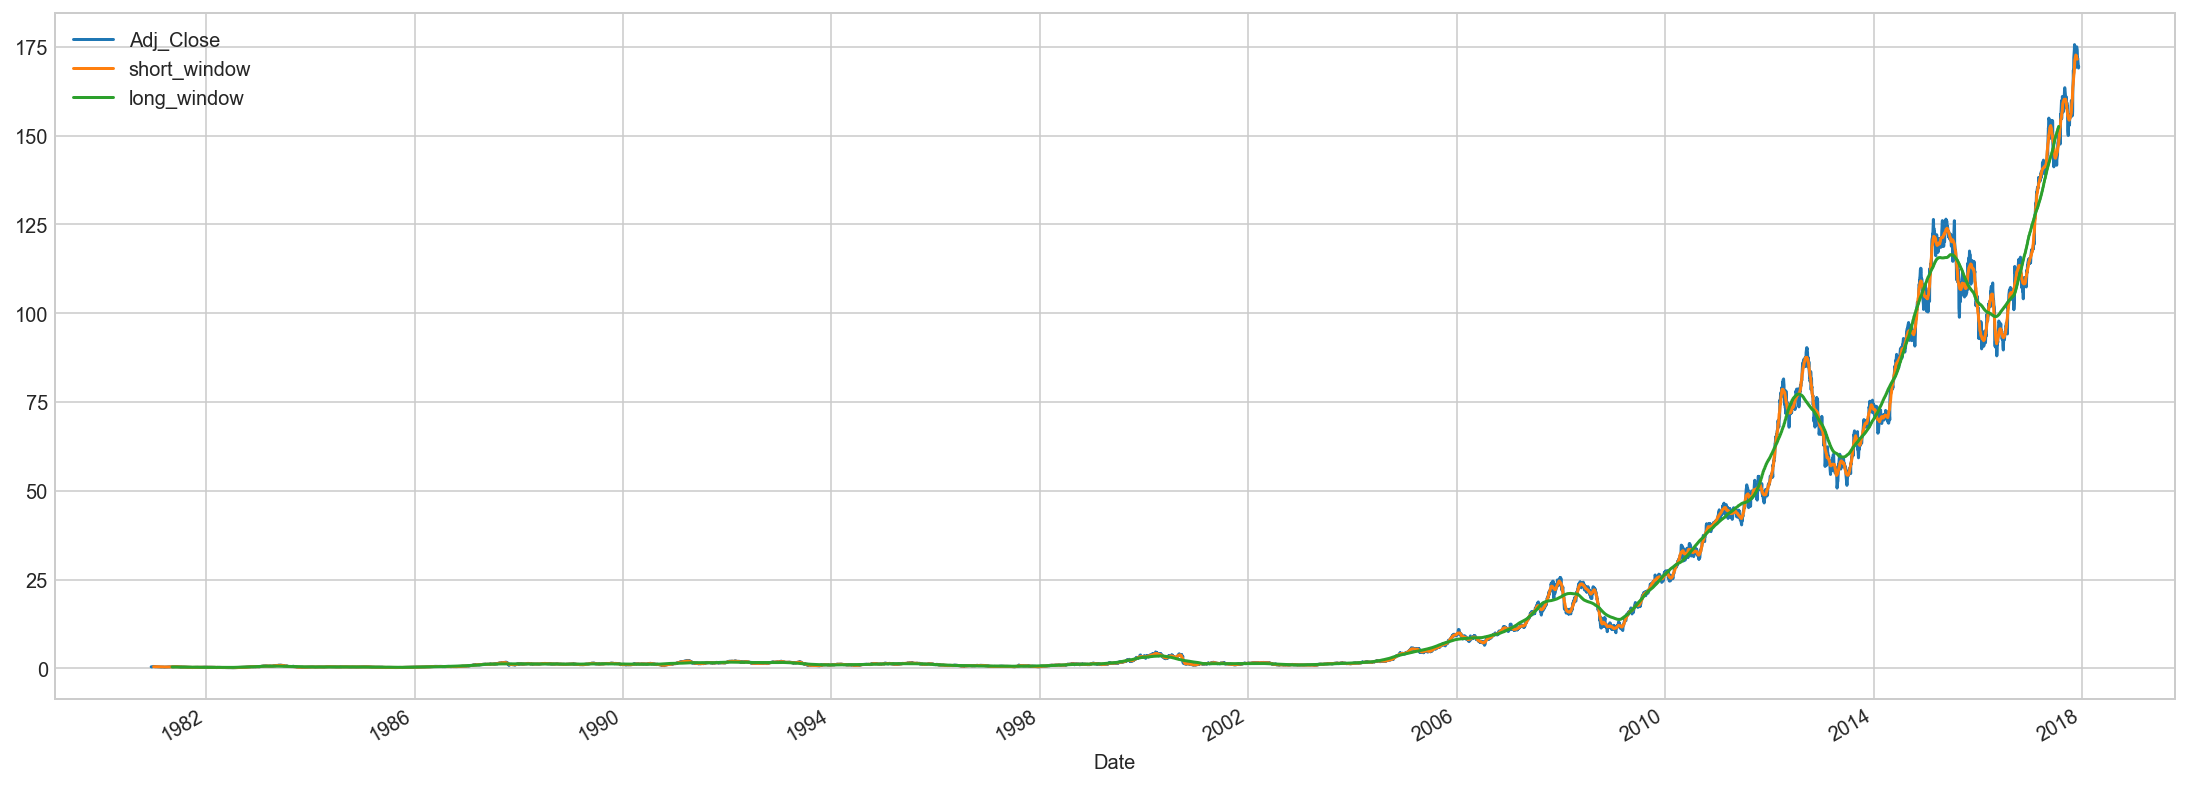

In [8]:
visuals.rolling_expanding_mean(df, col_name='Adj_Close', resample_option='none', short_window=20, long_window=200)

/Users/Javier/anaconda2/envs/udemy/lib/python3.6/site-packages/trading/graphs.py:47: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  roll_mean = dataset[[col_name]].resample(resample_option).rolling(window=short_window,
/Users/Javier/anaconda2/envs/udemy/lib/python3.6/site-packages/trading/graphs.py:50: FutureWarning: 
.resample() is now a deferred operation
You called expanding(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  resample_option).expanding().mean()
/Users/Javier/anaconda2/envs/udemy/lib/python3.6/site-packages/trading/graphs.py:53: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean()

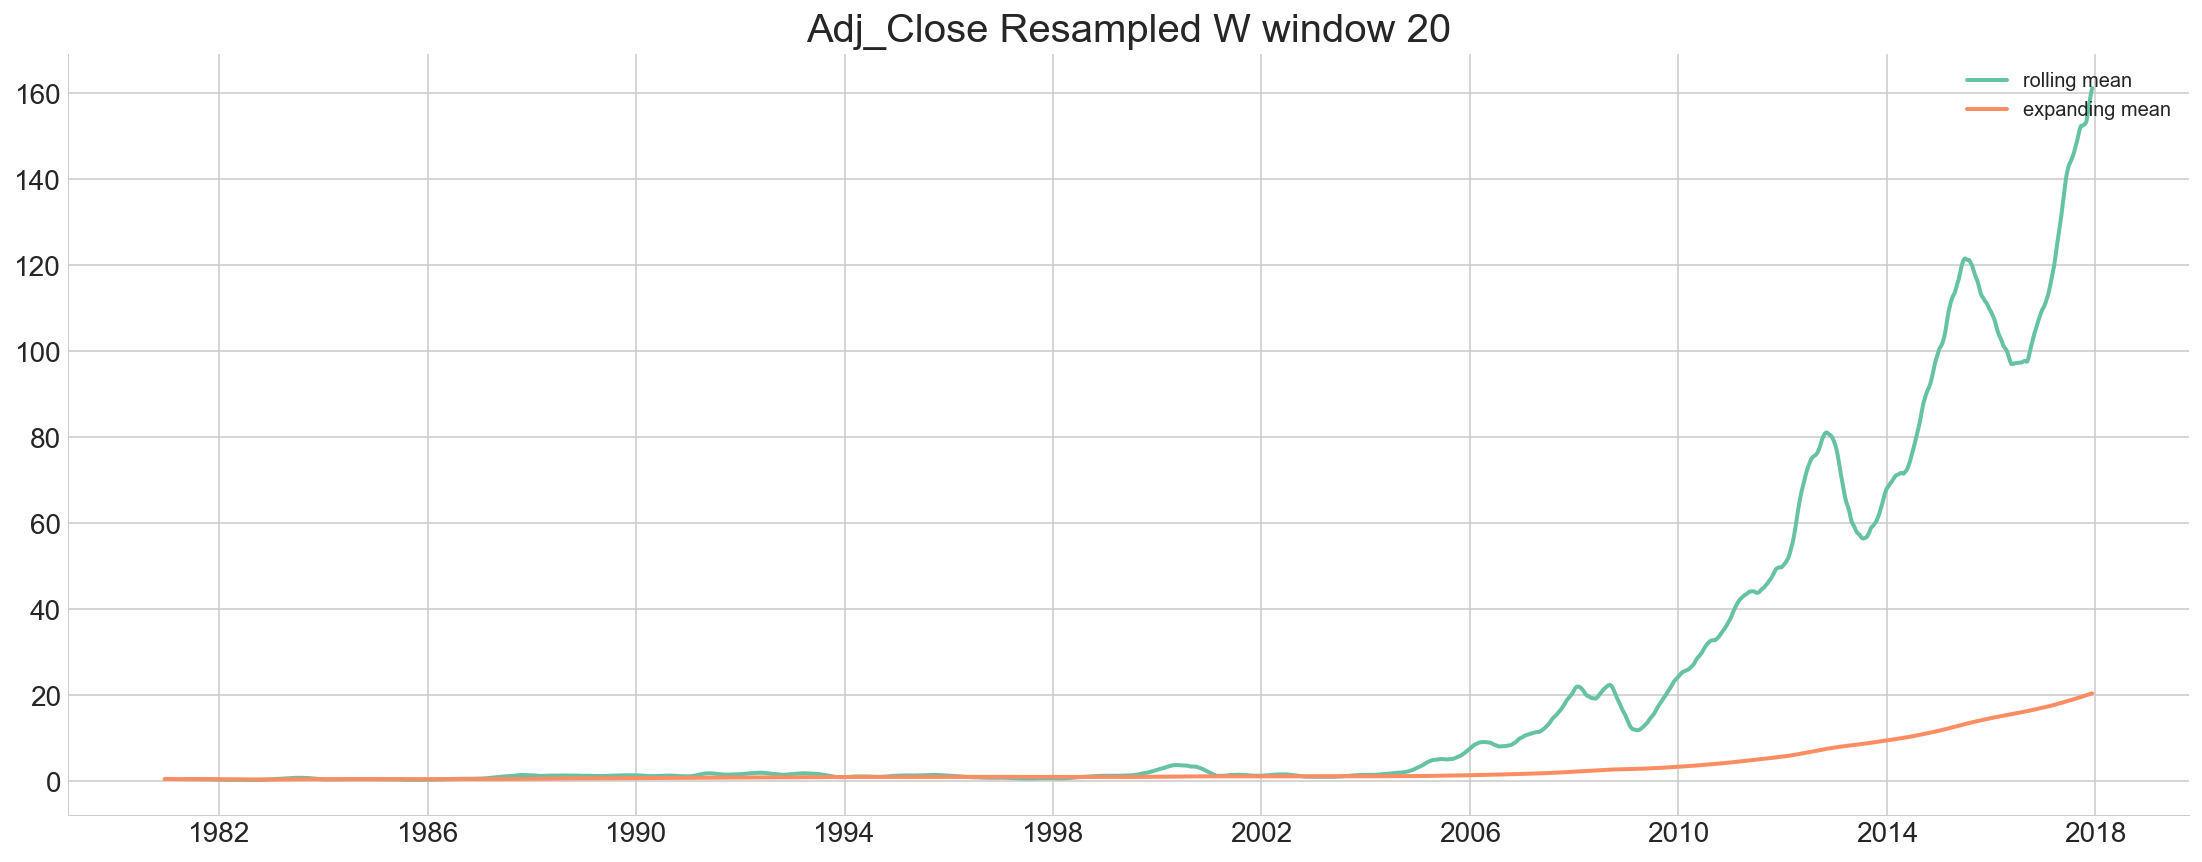

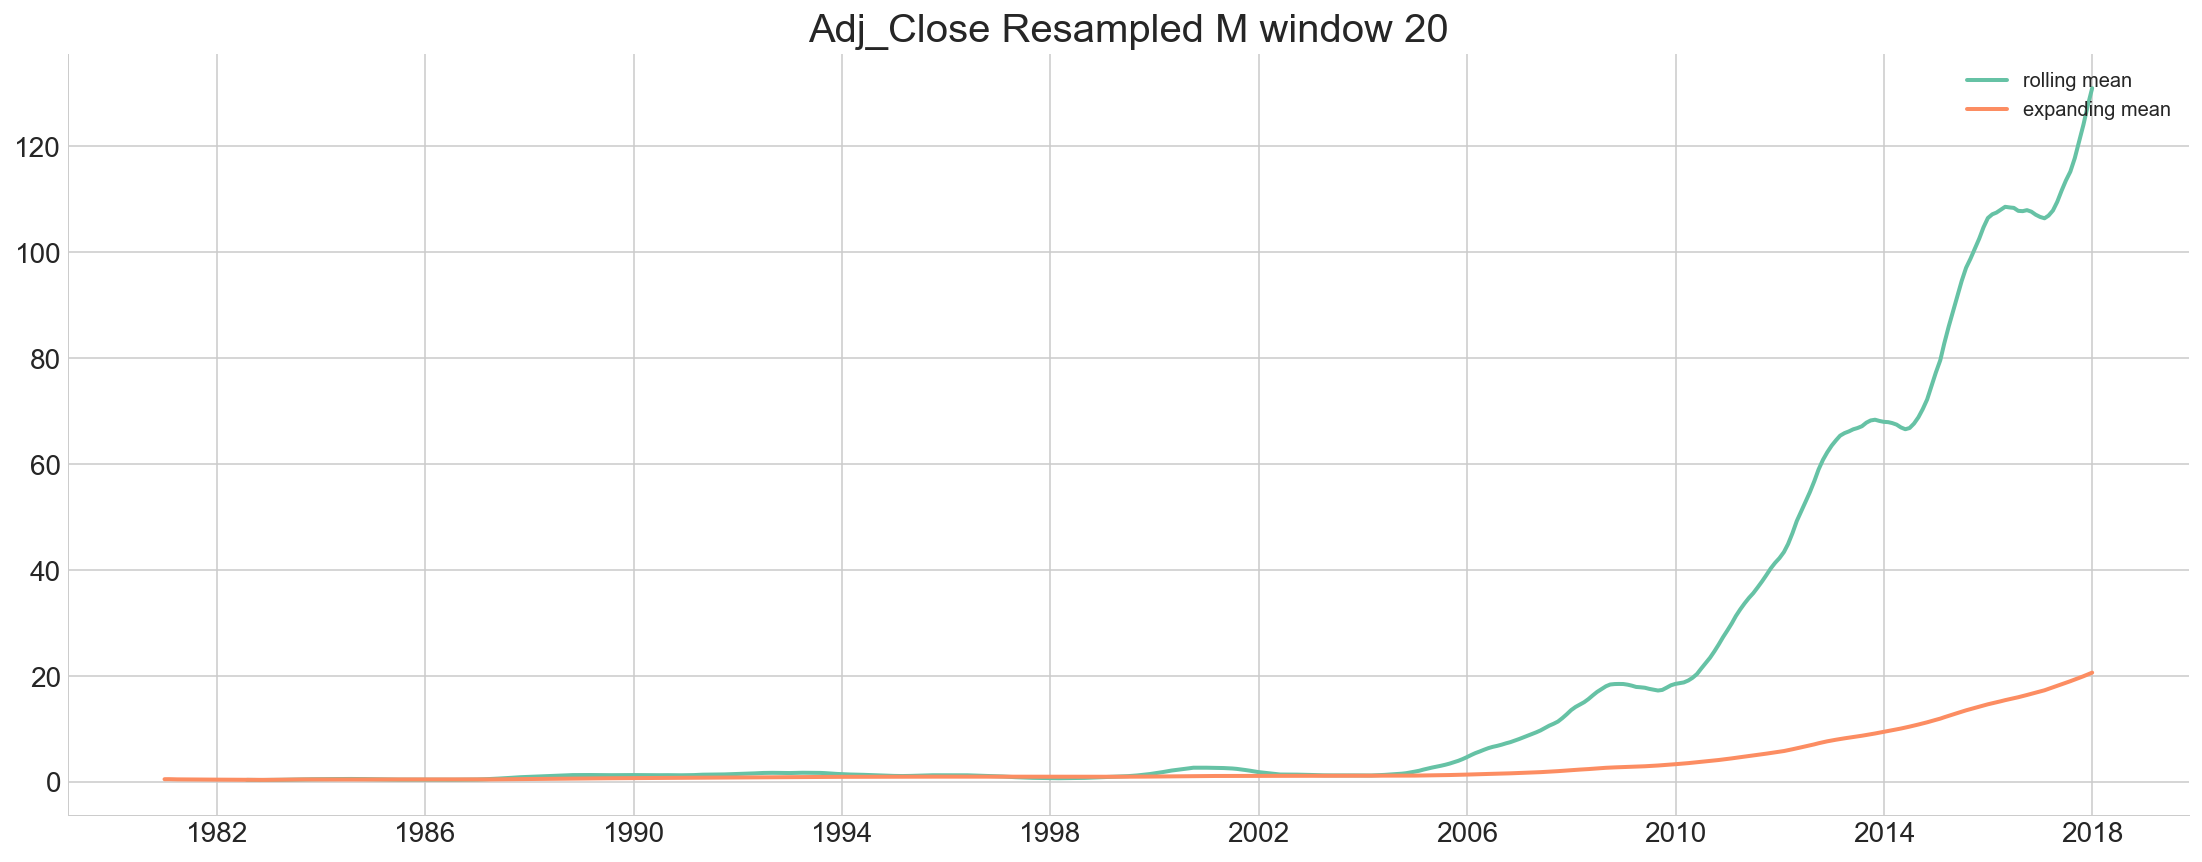

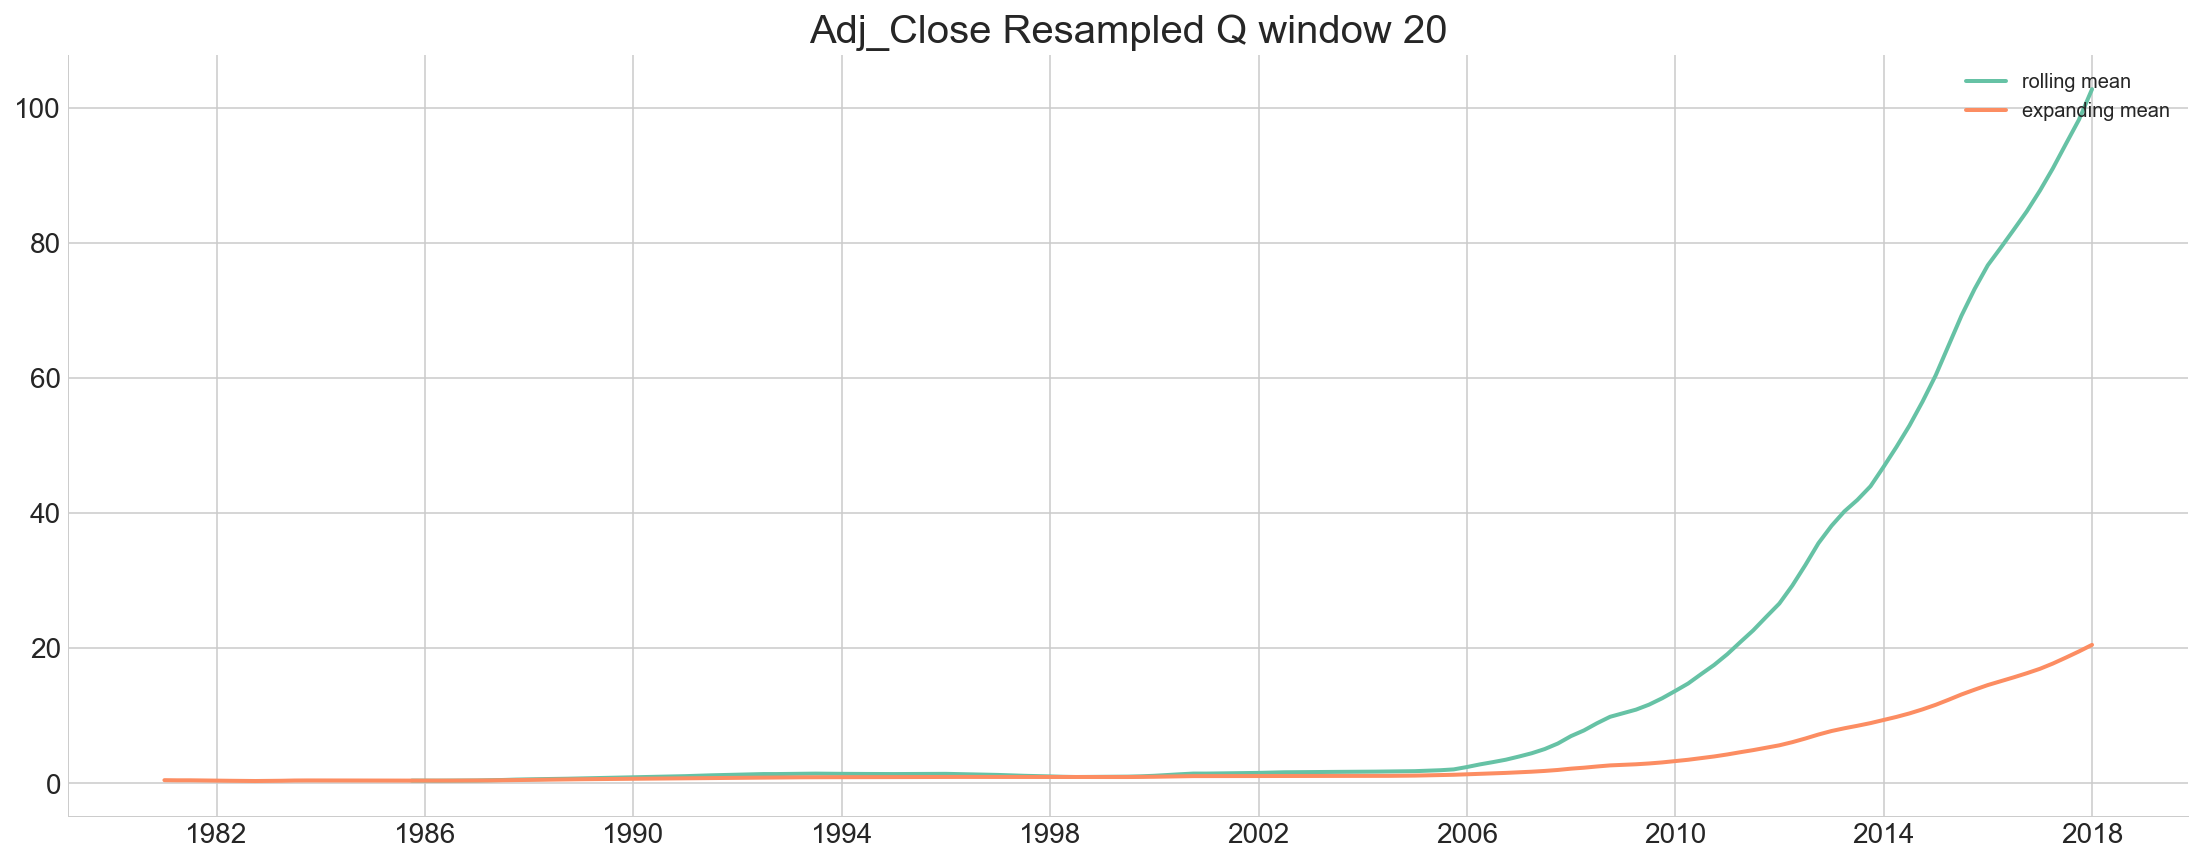

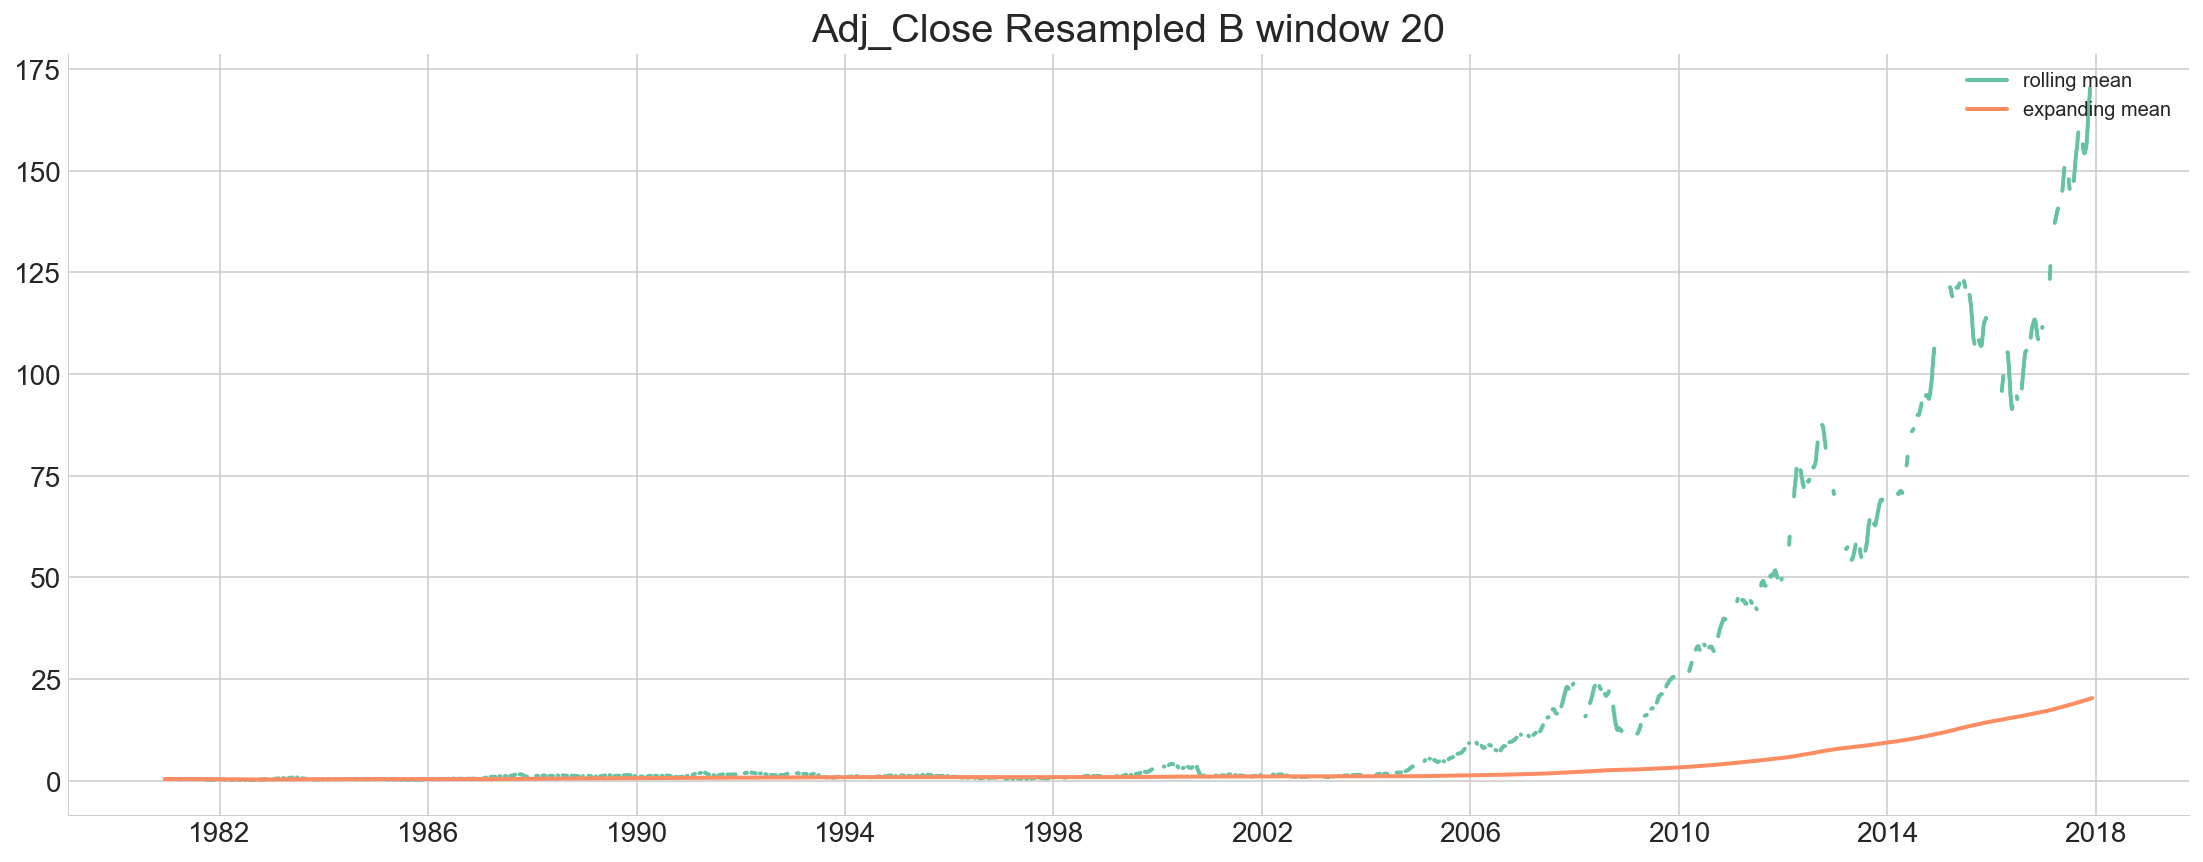

In [9]:
resampling_options = ['W','M','Q','B',  ]
'''
W = Weekly
M = Month end
Q = Quarter end
B = Business day
'''
for i in resampling_options:
    visuals.rolling_expanding_mean(df, col_name='Adj_Close', resample_option=i, short_window=20, long_window=200)

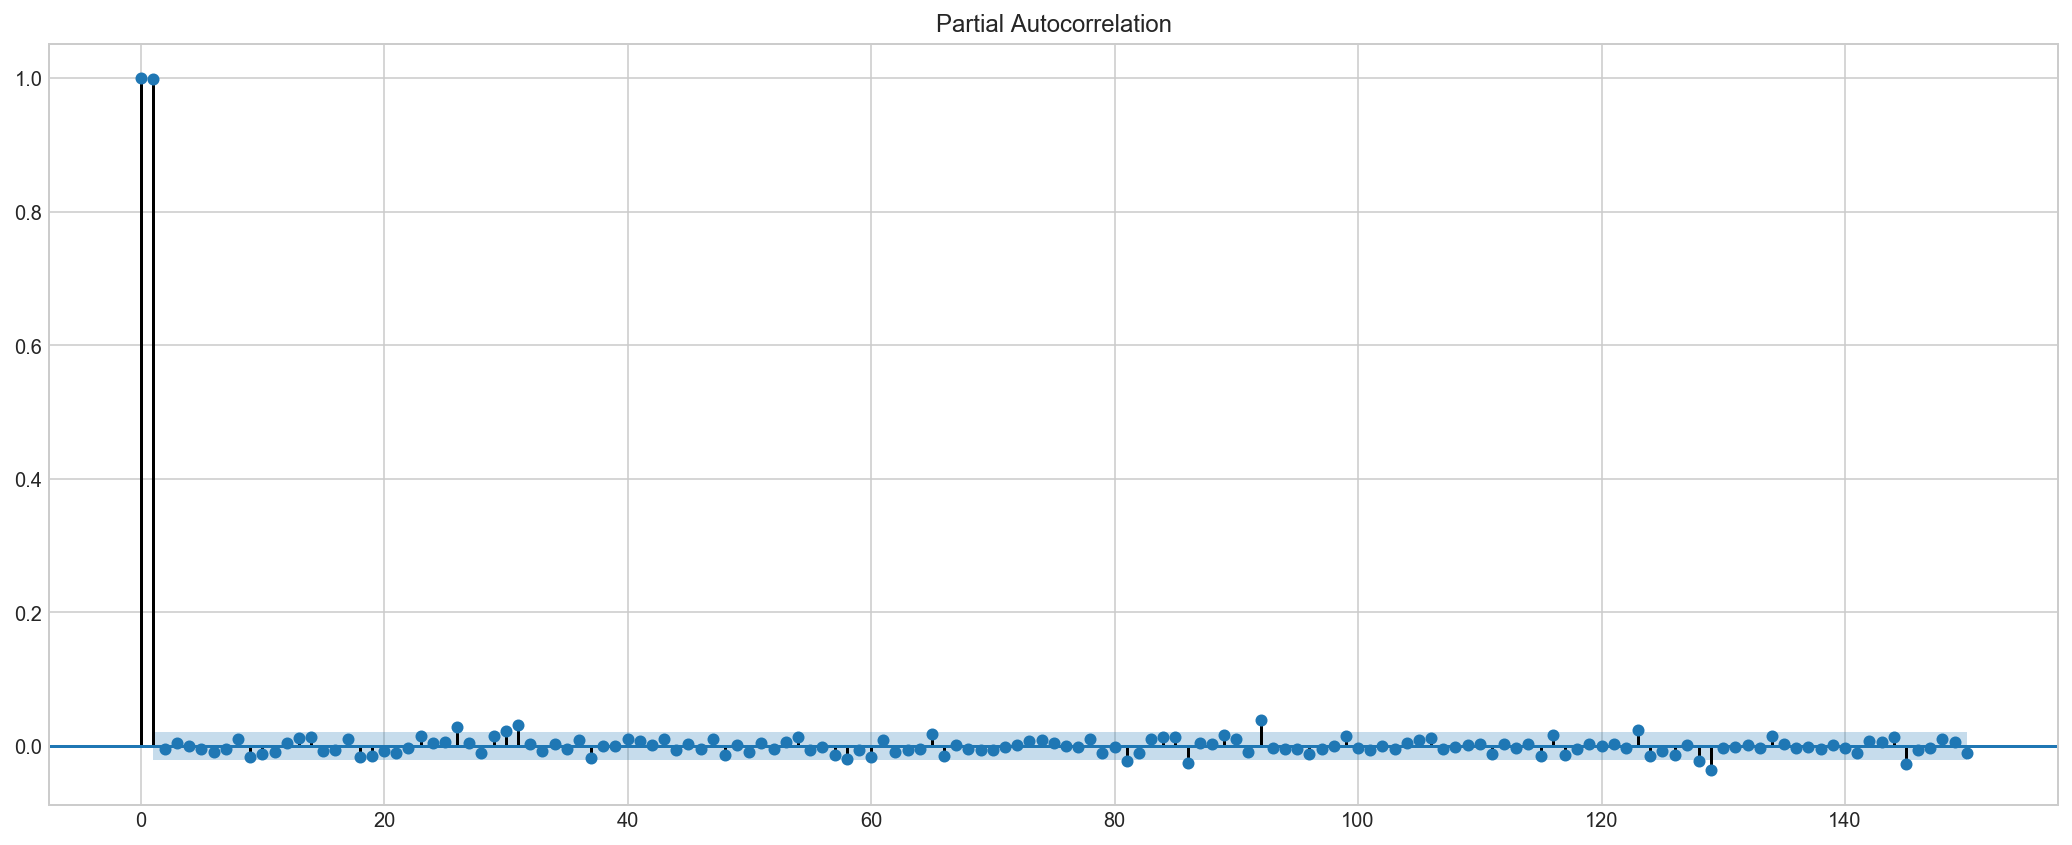

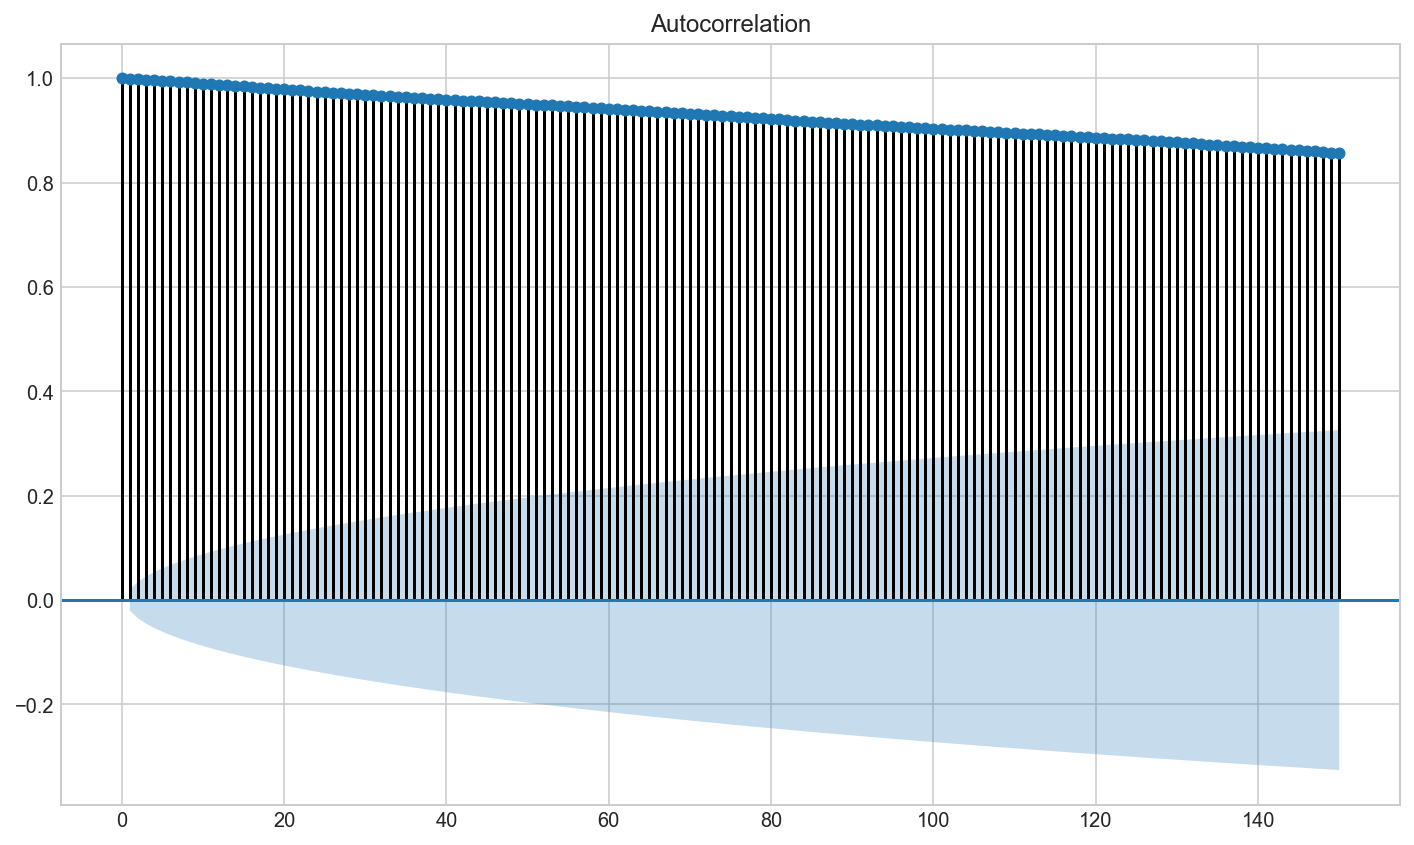

In [10]:
options=['partial', 'normal']
for i in options:
    visuals.correll_graphs(df, col_name='Adj_Close', periods=150, option=i)

## Trading Signal df
---

In [11]:
signals_df = strategy.trading_strat_signal(df, col_interest='Adj_Close', 
                                           num_periods=1, short_term=20, long_term=50)
signals_df.head(10)

,trading_signal,short_mov_ave,long_mov_ave,positions
Date,,,,
1980-12-12,0.0,0.421187,0.421187,NaN
1980-12-15,0.0,0.410200,0.410200,0.0
1980-12-16,0.0,0.396771,0.396771,0.0
1980-12-17,0.0,0.392327,0.392327,0.0
1980-12-18,0.0,0.391887,0.391887,0.0
1980-12-19,0.0,0.395550,0.395550,0.0
1980-12-22,0.0,0.401054,0.401054,0.0
1980-12-23,0.0,0.407471,0.407471,0.0
1980-12-24,0.0,0.415099,0.415099,0.0


In [12]:
signals_df[signals_df.positions==1]

,trading_signal,short_mov_ave,long_mov_ave,positions
Date,,,,
1981-01-13,1.0,0.456084,0.454422,1.0
1981-04-13,1.0,0.380548,0.377173,1.0
1981-10-29,1.0,0.273420,0.271804,1.0
1981-12-18,1.0,0.278701,0.278013,1.0
1982-08-05,1.0,0.192735,0.191997,1.0
1983-01-18,1.0,0.450678,0.449462,1.0
1983-04-26,1.0,0.655858,0.651424,1.0
1983-12-14,1.0,0.307372,0.306695,1.0
1984-03-14,1.0,0.387675,0.387311,1.0


In [13]:
signals_df[signals_df.positions==-1]

,trading_signal,short_mov_ave,long_mov_ave,positions
Date,,,,
1981-02-03,0.0,0.453051,0.453645,-1.0
1981-07-07,0.0,0.429692,0.430751,-1.0
1981-12-11,0.0,0.272658,0.274063,-1.0
1982-02-01,0.0,0.289440,0.290252,-1.0
1983-01-06,0.0,0.441522,0.442277,-1.0
1983-03-31,0.0,0.630257,0.631901,-1.0
1983-07-05,0.0,0.792103,0.796922,-1.0
1984-02-17,0.0,0.369451,0.372951,-1.0
1984-04-09,0.0,0.372205,0.373798,-1.0


## Returns from trading signal
----

In [14]:
portfolio = strategy.returns_trade_signal(df, signals_df, col_name='Adj_Close', 
                                          initial_invest=100000,  num_stock_buy=100)

In [15]:
portfolio.head(10)

,aapl,holdings,cash,total,returns
Date,,,,,
1980-12-12,0.0,0.0,NaN,NaN,NaN
1980-12-15,0.0,0.0,100000.0,100000.0,NaN
1980-12-16,0.0,0.0,100000.0,100000.0,0.0
1980-12-17,0.0,0.0,100000.0,100000.0,0.0
1980-12-18,0.0,0.0,100000.0,100000.0,0.0
1980-12-19,0.0,0.0,100000.0,100000.0,0.0
1980-12-22,0.0,0.0,100000.0,100000.0,0.0
1980-12-23,0.0,0.0,100000.0,100000.0,0.0
1980-12-24,0.0,0.0,100000.0,100000.0,0.0


In [16]:
portfolio.tail(10)

,aapl,holdings,cash,total,returns
Date,,,,,
2017-11-27,17409.0,17409.0,93277.617318,110686.617318,-0.000794
2017-11-28,17307.0,17307.0,93277.617318,110584.617318,-0.000922
2017-11-29,16948.0,16948.0,93277.617318,110225.617318,-0.003246
2017-11-30,17185.0,17185.0,93277.617318,110462.617318,0.002150
2017-12-01,17105.0,17105.0,93277.617318,110382.617318,-0.000724
2017-12-04,16980.0,16980.0,93277.617318,110257.617318,-0.001132
2017-12-05,16964.0,16964.0,93277.617318,110241.617318,-0.000145
2017-12-06,16901.0,16901.0,93277.617318,110178.617318,-0.000571
2017-12-07,16932.0,16932.0,93277.617318,110209.617318,0.000281


## Statistical test on the mean of the returns
---

** Control = Standard Moving Average cross-over (50/20)

** Treatment = Standard Moving Average cross-over (400/150)

> **H0:** The mean difference between treatment and control groups is zero.
    
> **H1:** The parameter of interest, our mean difference between treatment and control, is different than zero.   
    

In [17]:
signals_control = strategy.trading_strat_signal(df, col_interest='Adj_Close', 
                                           num_periods=1, short_term=20, long_term=50)
portfolio_control = strategy.returns_trade_signal(df, signals_df, col_name='Adj_Close', 
                                          initial_invest=100000,  num_stock_buy=100)

signals_treatment = strategy.trading_strat_signal(df, col_interest='Adj_Close', 
                                           num_periods=1, short_term=150, long_term=400)
portfolio_treatment = strategy.returns_trade_signal(df, signals_df, col_name='Adj_Close', 
                                          initial_invest=100000,  num_stock_buy=100)

In [18]:
import scipy.stats as stats
mean_control = np.mean(portfolio_control['returns'])
mean_treatment = np.mean(portfolio_treatment['returns'])
print (mean_control, mean_treatment, mean_control-mean_treatment)
stats.ttest_ind(mean_treatment, mean_control)

1.05238584929e-05 1.05238584929e-05 0.0


/Users/Javier/anaconda2/envs/udemy/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3146: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/Javier/anaconda2/envs/udemy/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Ttest_indResult(statistic=nan, pvalue=nan)

In [19]:
std_control = np.std(portfolio_control['returns'])
std_treatment = np.std(portfolio_treatment['returns'])
z_value = 1.96

In [20]:
def confidence_calculation(mean_value=0, std_value=1, z_score=0.8, sample_size=100):
    '''[sample_mean - z_value(sample_std/sqrt(sample_size))] < μ < [sample_mean + z_value(sample_std/sqrt(sample_size))]'''
    lef_side = mean_value - (z_score*(std_value/np.sqrt(sample_size)))
    right_side = mean_value + (z_score*(std_value/np.sqrt(sample_size)))
    text =  "The true population mean is likely to be between "
    print (text+str(lef_side) + " and " + str(right_side) )

In [21]:
confidence_calculation(mean_value=mean_control, std_value=std_control, z_score=z_value, 
                       sample_size=len(portfolio_control['returns']))

The true population mean is likely to be between 1.62776101177e-06 and 1.94199559739e-05


In [22]:
confidence_calculation(mean_value=mean_treatment, std_value=std_treatment, z_score=z_value, 
                       sample_size=len(portfolio_treatment['returns']))

The true population mean is likely to be between 1.62776101177e-06 and 1.94199559739e-05
